<a href="https://colab.research.google.com/github/ShashankMk031/Marvel_1_LinearRegression/blob/main/LinearRegression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd     #Importing necessary models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
california_housing = fetch_california_housing(as_frame=True) # Creating DataFrame using pandas
df = california_housing.frame

#Checking for null values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [3]:
#EDA on the dataset

print("Dataset Description:")
print(california_housing.DESCR)
print("\nDataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())
print("\nDataFrame Describe:")
print(df.describe())

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census,

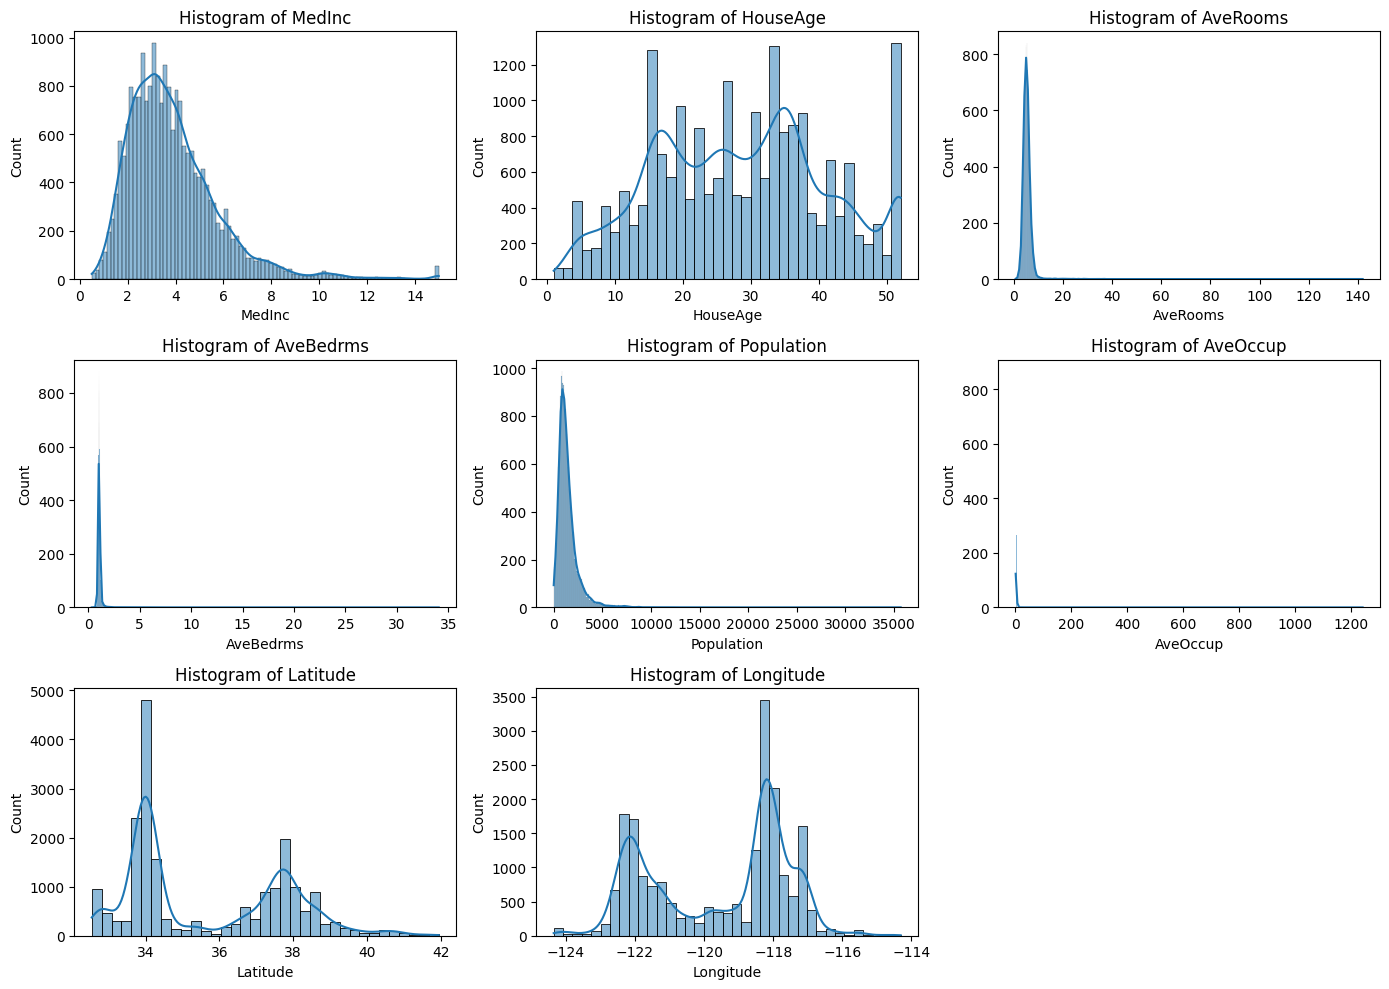

In [9]:
# 3. Histogram
plt.figure(figsize=(14, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

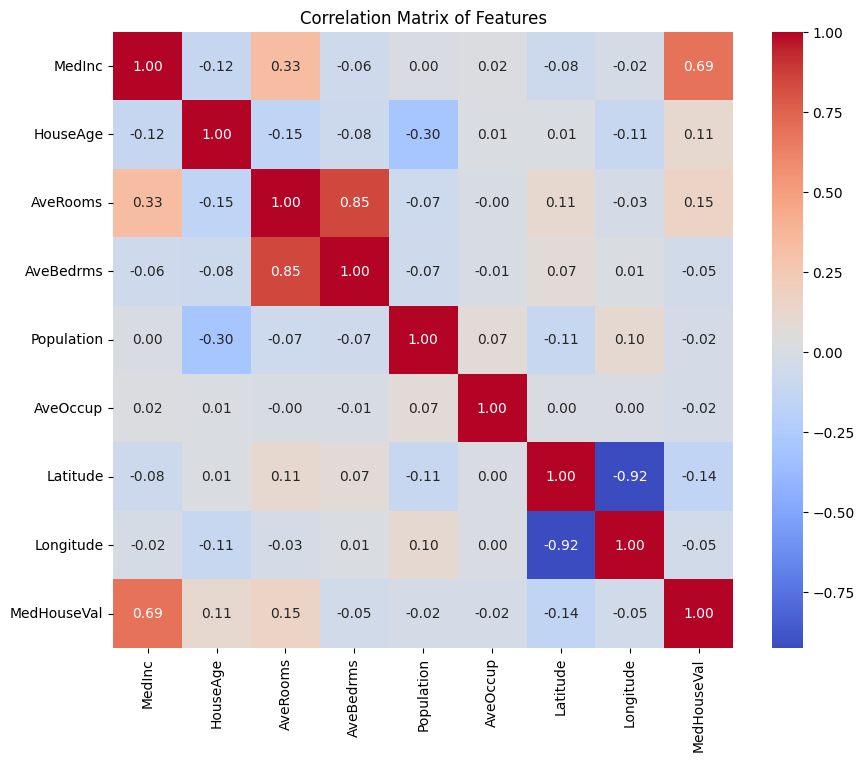

In [6]:
# 1. Correlation Matrix for understanding relation between thetas
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

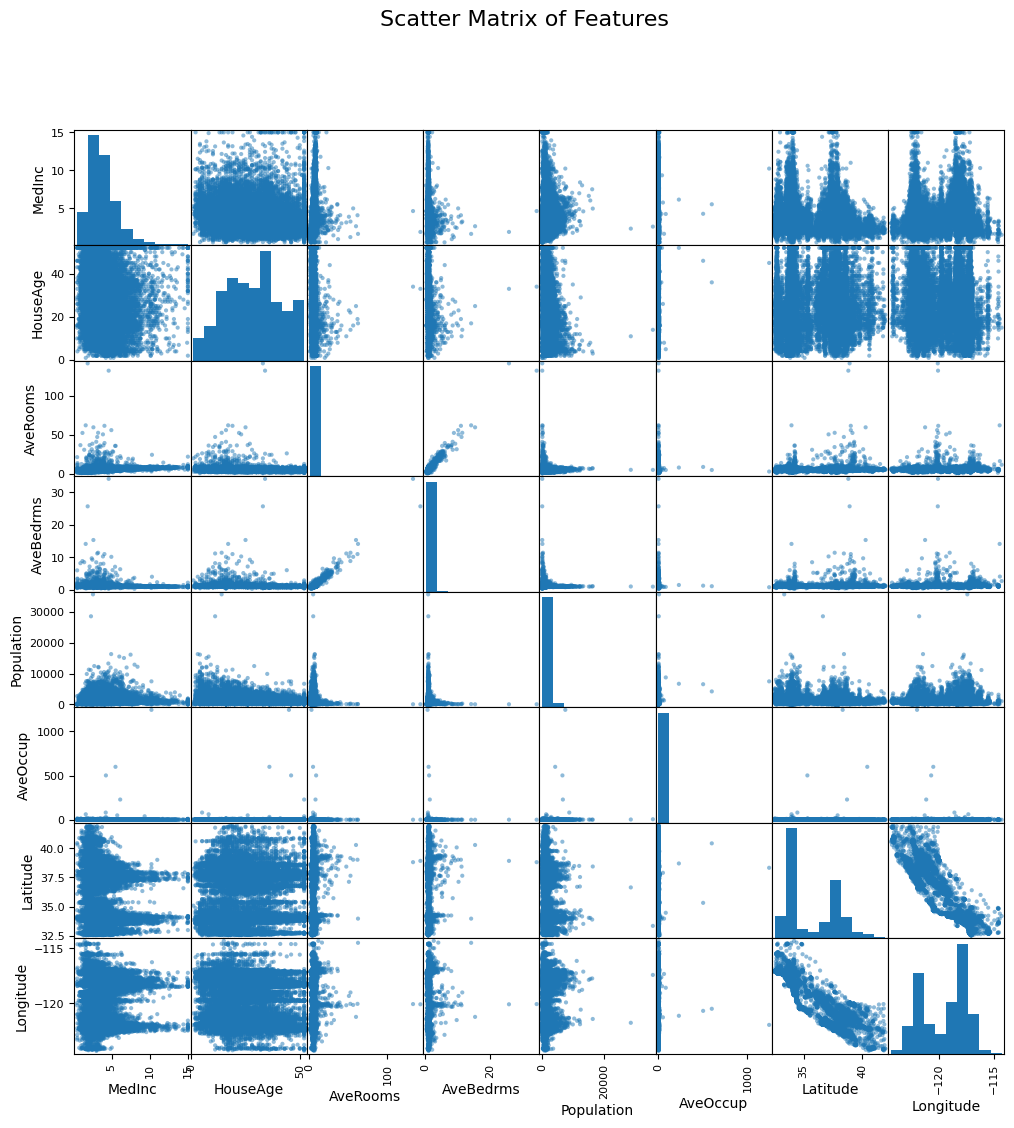

In [8]:
# 2. Scatter Matrix
feature_names = california_housing.feature_names
scatter_matrix_df = pd.DataFrame(df, columns=feature_names)
pd.plotting.scatter_matrix(scatter_matrix_df, figsize=(12, 12))
plt.suptitle('Scatter Matrix of Features', fontsize=16)
plt.show()

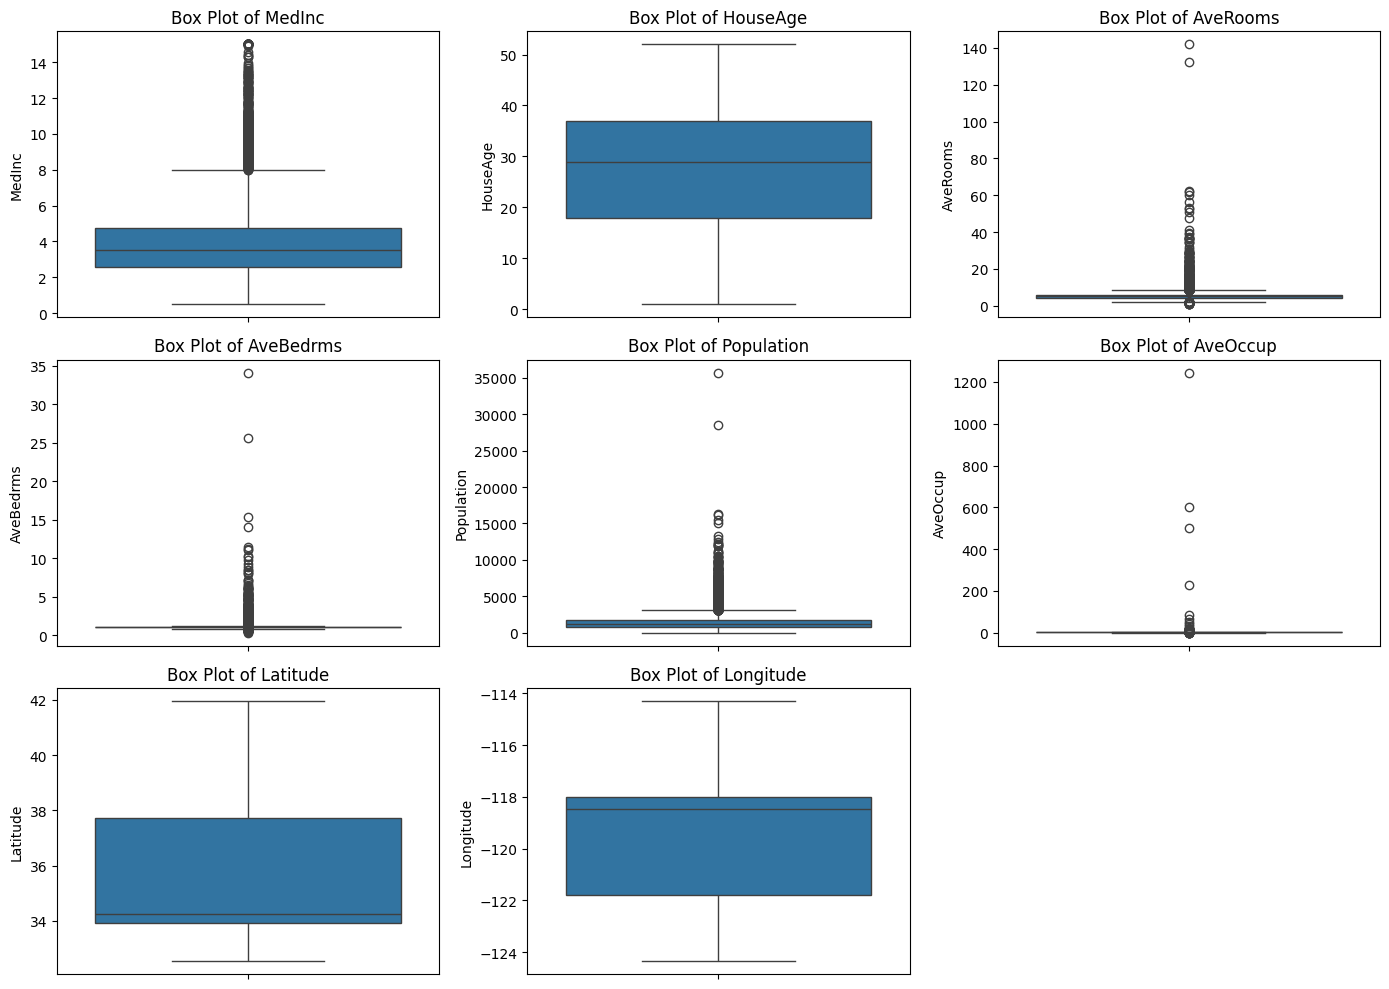

In [10]:
# 4. Box Plots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [11]:
#Spliting Data
X = df.drop('MedHouseVal', axis=1) # Features
y = df['MedHouseVal'] # Target var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression model trained.") #Model is successfully trained.


Linear Regression model trained.


In [13]:

#Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R2): 0.58


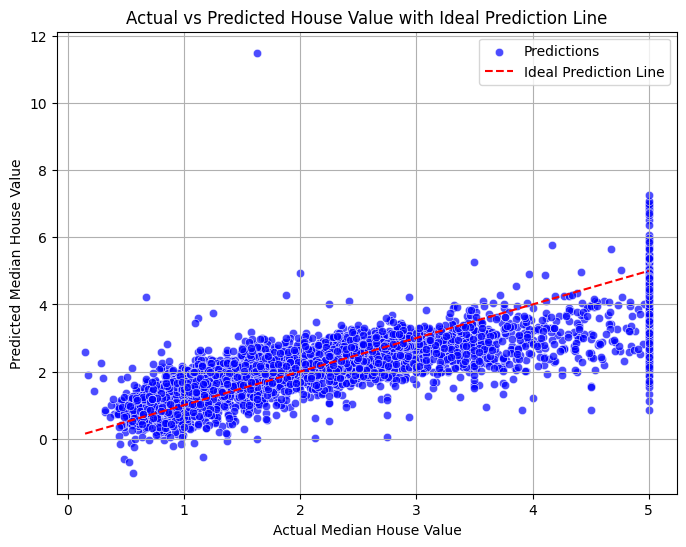

In [17]:
#Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Predictions')

line_x = np.linspace(y_test.min(), y_test.max(), 100) # Creating hypothetical function
plt.plot(line_x, line_x, color='red', linestyle='--', label='Ideal Prediction Line')

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Value with Ideal Prediction Line")
plt.grid(True)
plt.legend()
plt.show()